# Dust emission

`Synthesizer` has the capability of creating a dust emission spectrum using a simple energy balance approach. 

### Dust emission models

`Synthesizer` contains a handful of dust emission models, let's explore these first:

In [1]:
from synthesizer.dust import emission as dust
import matplotlib.pyplot as plt
import numpy as np
from unyt import um, K

In [2]:
lam = np.arange(1, 10000, 1) * um

/Users/sw376/Dropbox/Research/projects/synthesizer/venv/lib/python3.10/site-packages/unyt/array.py:1802: RuntimeWarning: overflow encountered in exp
  out_arr = func(np.asarray(inp), out=out_func, **kwargs)


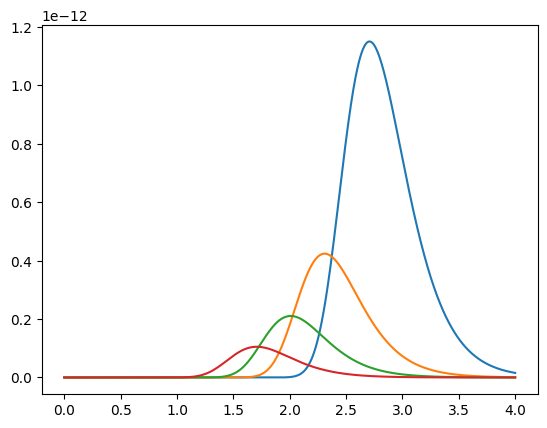

In [3]:

for T in [10,25,50,100]:
    model = dust.Blackbody(T*K)
    plt.plot(np.log10(lam), model.lnu(lam))


[0.00000000e+000 0.00000000e+000 8.58659413e-210 ... 6.66385754e-017
 6.66150747e-017 6.65915847e-017] erg
[1.73429373e-251 6.68287836e-128 4.69681433e-087 ... 1.01890873e-018
 1.01854486e-018 1.01818115e-018] erg
[3.34076153e-128 4.21111340e-067 4.39346286e-047 ... 4.26191319e-020
 4.26038496e-020 4.25885742e-020] erg
[2.10593941e-67 1.51828259e-37 6.10306124e-28 ... 1.77044319e-21
 1.76980707e-21 1.76917123e-21] erg


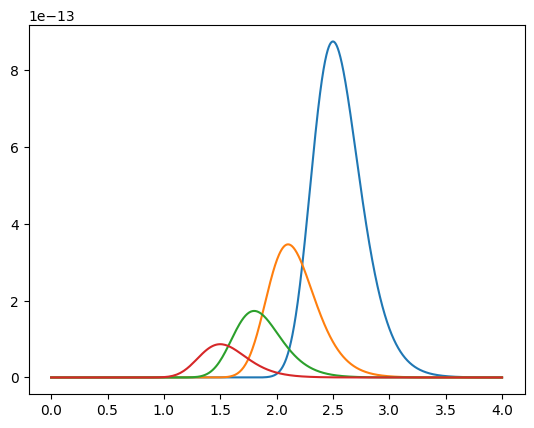

In [4]:
for T in [10,25,50,100]:
    model = dust.Greybody(T*K, 1.6)
    plt.plot(np.log10(lam), model.lnu(lam))
    print(model.lnu(lam))

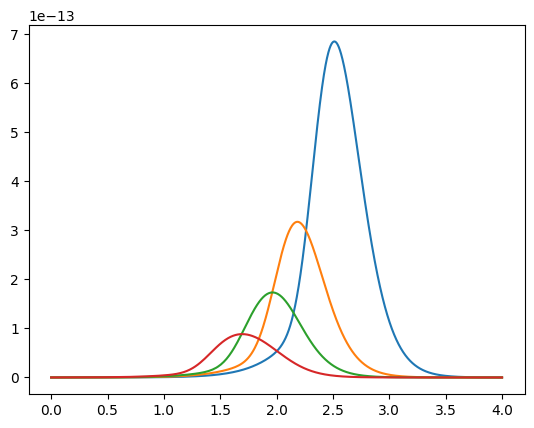

In [5]:
for T in [10,25,50,100]:
    model = dust.Casey12(T*K, 1.6, 2.0)
    plt.plot(np.log10(lam), model.lnu(lam))